In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

folder_path = '/content/drive/MyDrive/geo/2/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_2 = dataframes.copy()
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import time

whole_data = []
for i in range(len(df_2)):
  b = df_2[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(102,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data.append(b_scale)

# well data 3개를 test로 구분
train_df_2 = pd.concat(whole_data[:-3], ignore_index=True)
test_df_2 = pd.concat(whole_data[-3:], ignore_index=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

folder_path = '/content/drive/MyDrive/geo/6/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_6 = dataframes.copy()
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import time

whole_data_6 = []
for i in range(len(df_6)):
  b = df_6[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(106,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_6.append(b_scale)

# well data 3개를 test로 구분
train_df_6 = pd.concat(whole_data_6[:-3], ignore_index=True)
test_df_6 = pd.concat(whole_data_6[-3:], ignore_index=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

folder_path = '/content/drive/MyDrive/geo/8/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_8 = dataframes.copy()
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import time

whole_data_8 = []
for i in range(len(df_8)):
  b = df_8[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(108,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = StandardScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_8.append(b_scale)

# well data 3개를 test로 구분
train_df_8 = pd.concat(whole_data_8[:-3], ignore_index=True)
test_df_8 = pd.concat(whole_data_8[-3:], ignore_index=True)

In [ ]:
folder_path = '/content/drive/MyDrive/geo/0/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_0 = dataframes.copy()

whole_data_0 = []
for i in range(len(df_0)):
  b = df_0[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_0.append(b_scale)

train_df_0 = pd.concat(whole_data_0, ignore_index=True)

In [ ]:
import lightgbm as lgb
import time
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

result_df_2 = pd.concat([train_df_0, train_df_2], axis=0, ignore_index=True)

result_df_2 = result_df_2.dropna(subset=['class'])
test_df_2 = test_df_2.dropna(subset=['class'])

X_train_2 = result_df_2.drop('class', axis=1)
y_train_2 = result_df_2['class']
X_test_2 = test_df_2.drop('class', axis=1)
y_test_2 = test_df_2['class']


start_time = time.time()

lgb = lgb.LGBMClassifier(force_row_wise=True)
lgb.fit(X_train_2, y_train_2)

y_pred_2= lgb.predict(X_test_2)
f1 = f1_score(y_test_2, y_pred_2, average='macro')
print("모델 2 f1 score : ", f1)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"모델 2 실행 시간: {elapsed_time}초")
print("----------------------------------------------------")


[LightGBM] [Info] Number of positive: 61909, number of negative: 1929426
[LightGBM] [Info] Total Bins 1697
[LightGBM] [Info] Number of data points in the train set: 1991335, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031089 -> initscore=-3.439312
[LightGBM] [Info] Start training from score -3.439312
모델 2 f1 score :  0.8811046447780748
모델 2 실행 시간: 13.568647861480713초
----------------------------------------------------


In [ ]:
import lightgbm as lgb
import time
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

result_df_6 = pd.concat([train_df_0, train_df_6], axis=0, ignore_index=True)

result_df_6 = result_df_6.dropna(subset=['class'])
test_df_6 = test_df_6.dropna(subset=['class'])


X_train_6 = result_df_6.drop('class', axis=1)
y_train_6 = result_df_6['class']
X_test_6 = test_df_6.drop('class', axis=1)
y_test_6 = test_df_6['class']


start_time = time.time()
import lightgbm as lgb
lgb = lgb.LGBMClassifier(force_row_wise=True)
lgb.fit(X_train_6, y_train_6)

y_pred_6 = lgb.predict(X_test_6)
f1 = f1_score(y_test_6, y_pred_6, average='macro')
print("모델 6 f1 score : ", f1)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"모델 6 실행 시간: {elapsed_time}초")
print("----------------------------------------------------")



[LightGBM] [Info] Number of positive: 768389, number of negative: 2279244
[LightGBM] [Info] Total Bins 1594
[LightGBM] [Info] Number of data points in the train set: 3047633, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.252126 -> initscore=-1.087303
[LightGBM] [Info] Start training from score -1.087303
모델 6 f1 score :  0.9786232880142018
모델 6 실행 시간: 24.750978231430054초
----------------------------------------------------


In [ ]:
import lightgbm as lgb
import time
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

result_df_8 = pd.concat([train_df_0, train_df_8], axis=0, ignore_index=True)

result_df_8 = result_df_8.dropna(subset=['class'])
test_df_8 = test_df_8.dropna(subset=['class'])


X_train_8 = result_df_8.drop('class', axis=1)
y_train_8 = result_df_8['class']
X_test_8 = test_df_8.drop('class', axis=1)
y_test_8 = test_df_8['class']


start_time = time.time()
import lightgbm as lgb
lgb = lgb.LGBMClassifier(force_row_wise=True)
lgb.fit(X_train_8, y_train_8)

y_pred_8 = lgb.predict(X_test_8)
f1 = f1_score(y_test_8, y_pred_8, average='macro')
print("모델 8 f1 score : ", f1)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"모델 8 실행 시간: {elapsed_time}초")
print("----------------------------------------------------")

[LightGBM] [Info] Number of positive: 116059, number of negative: 2193548
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 2309607, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.050251 -> initscore=-2.939177
[LightGBM] [Info] Start training from score -2.939177
모델 8 f1 score :  0.9522825122208856
모델 8 실행 시간: 17.212374687194824초
----------------------------------------------------


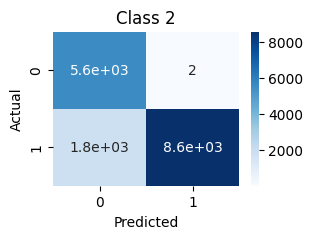

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test_2, y_pred_2)

plt.figure(figsize=(3,2))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Class 2')
plt.show()

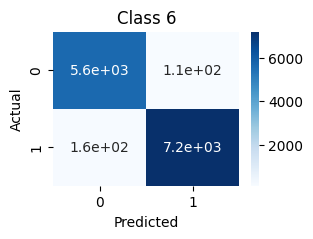

In [ ]:
cf_matrix = confusion_matrix(y_test_6, y_pred_6)

plt.figure(figsize=(3,2))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Class 6')
plt.show()

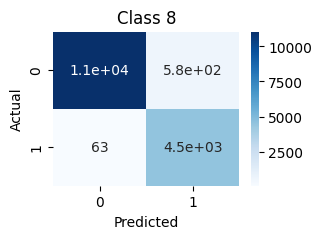

In [ ]:
cf_matrix = confusion_matrix(y_test_8, y_pred_8)

plt.figure(figsize=(3,2))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Class 8')
plt.show()